<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Plant_disease_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seeding for reproducibility

In [39]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## Importing Depencies

In [44]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

## Data Curation

In [9]:
!pip install kaggle

In [45]:
kaggle_credentials  = json.load(open("kaggle.json"))

In [46]:
#setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [47]:
!kaggle datasets download  -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [48]:
!ls

 class_indices.json   kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [49]:
#Unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
   zipObj.extractall()

In [50]:
print(os.listdir("plantvillage dataset/"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'color', 'grayscale']
38
['Tomato___Leaf_Mold', 'Apple___Apple_scab', 'Peach___healthy', 'Tomato___Early_blight', 'Soybean___healthy']
38
['Tomato___Leaf_Mold', 'Apple___Apple_scab', 'Peach___healthy', 'Tomato___Early_blight', 'Soybean___healthy']
38
['Tomato___Leaf_Mold', 'Apple___Apple_scab', 'Peach___healthy', 'Tomato___Early_blight', 'Soybean___healthy']


In [51]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['da73a76d-506a-4a34-bedd-e79998f3949c___Mt.N.V_HL 8958.JPG', '103b436c-40f5-40e7-b292-ae1bc619e194___Mt.N.V_HL 6084.JPG', '25180138-3b60-452e-ac9c-70b664d315e8___Mt.N.V_HL 8988.JPG', '69de7c79-dd0d-4793-95ca-92bb44c06cf5___Mt.N.V_HL 6076.JPG', '1c453594-a071-422c-a733-49aa167bac99___Mt.N.V_HL 6118.JPG']


## Data Preprocessing

In [52]:
#Dataset path
base_dir = "plantvillage dataset/color"

(256, 256, 3)


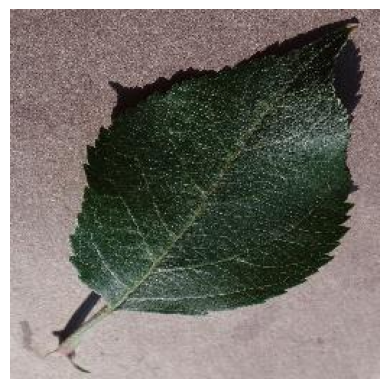

In [53]:
image_path = '/content/plantvillage dataset/color/Apple___healthy/0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG'

#Read the image
img = mpimg.imread(image_path)

print(img.shape)
#Display the image
plt.imshow(img)
plt.axis('off')
plt.show()


In [54]:
#image parameters
img_size = 224
batch_size = 32

## Train-Test Split

In [56]:
#image data generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 #set aside 20% of the data for validation
)

In [57]:
#Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training', #set as training data
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [58]:
#Validator Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation', #set as validation data
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


## Convolutional Neural Network

In [59]:
#Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
#Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
#compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Model Training

In [62]:
#Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size, #Number of steps per each epoch
    epochs=5,  #Nmuber of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size #Validation steps
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 121s 85ms/step - accuracy: 0.6045 - loss: 1.8630 - val_accuracy: 0.8295 - val_loss: 0.5429
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1874
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 90s 66ms/step - accuracy: 0.9179 - loss: 0.2567 - val_accuracy: 0.8528 - val_loss: 0.5002
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.3842e-07
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.9643 - loss: 0.1088 - val_accuracy: 0.8855 - val_loss: 0.4353


## Model Evaluation

In [63]:
# Model Evaluation
print("Evaluating Model.....")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

Evaluating Model.....
339/339 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.8879 - loss: 0.4292
Validation Loss: 0.43564388155937195
Validation Accuracy: 0.8855088353157043


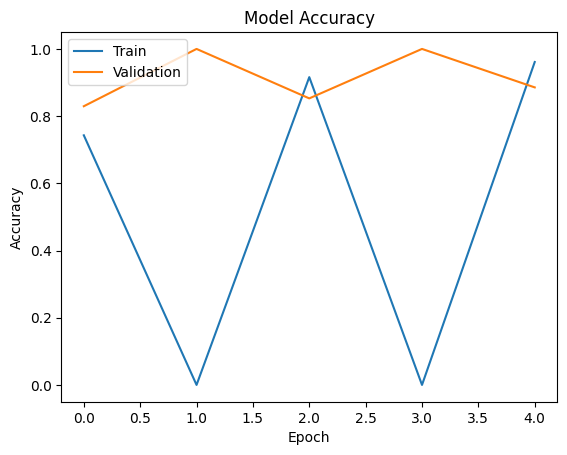

In [64]:
#plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

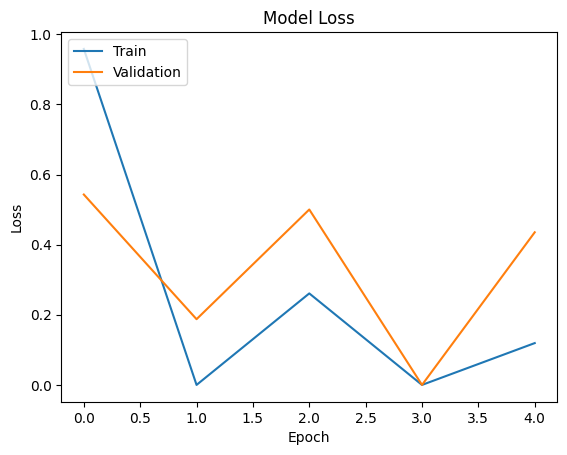

In [65]:
#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

## Building a Predictive Model

In [66]:
#Function to load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
    #load image
    img = Image.open(image_path)
    #resize image
    img = img.resize((img_size, img_size))
    # convert image to a numpy array
    img_array = np.array(img)
    #add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.0
    return img_array

#Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [67]:
#Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [68]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [69]:
#saving the class name as json file
json.dump(class_indices, open("class_indices.json", "w"))

In [70]:
#Example
image_path =
predicted_class_name = predict_image_class(model, image_path, class_indices)
print(f"The predicted class is: {predicted_class_name}")

SyntaxError: invalid syntax (<ipython-input-70-913580c48b3b>, line 2)

## Saving the Model

In [ ]:
model.save('drive')